# Fuel economy: carculator vs. GREET (only 2022) vs AFLEET (only 2020 and 2023)

GREET/AFLEET cleaned-up data: "car_fuel_consmp" sheet @ https://docs.google.com/spreadsheets/d/1-8Psgcxqoh8eQ12n0QqfC2Ec6IUnzU8_witE_Nftl9s/edit#gid=1678979062

In [ ]:
#!pip install carculator

In [ ]:
!pip list -v | grep carcu

carculator                       1.8.4                 /usr/local/lib/python3.10/dist-packages pip
carculator-utils                 1.1.0                 /usr/local/lib/python3.10/dist-packages pip


In [ ]:
import pandas as pd
import numpy as np
from carculator import *
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
# path
drive.mount('/content/gdrive')
gdrive_path = '/content/gdrive/My Drive/02.22_FRQ_Mobilité_durable_IVEO/Project/Lit_review_resources/tools/carculator'

Mounted at /content/gdrive


In [ ]:
greet_year = [2000,2005,2010,2015,2020,2025,2030,2035,2050]

### using US EPA UDDS driving cycle

In [ ]:
fname = f'{gdrive_path}/trial_code/benchmark/figs_in_disc/DC/USEPA/udds.txt'
udds = pd.read_csv(fname,header=1, sep = "\t")
#changing udds mph to kmperh
udds["kmh"] = udds["Test Time, secs Target Speed, mph"] * 1.60934
udds_kmh = np.array(udds['kmh'])

In [ ]:
cip = CarInputParameters()
cip.static()
dcts, array = fill_xarray_from_input_parameters(cip)

### 1. gas: only choose cars, no SUV & vans, using US-udds driving cycle and in the U.S.

In [ ]:
scope = {
    'powertrain':["ICEV-p"],
    'size': ["Small", "Large", "Mini", "Lower medium", "Medium"]  #"Medium SUV", "Large SUV"
}
_, array = fill_xarray_from_input_parameters(cip, scope=scope)
array = array.interp(year=greet_year,  kwargs={'fill_value': 'extrapolate'})
cm = CarModel(array, cycle=udds_kmh, country="US")
cm.set_all()

In [ ]:
carc_f_2000_2050 = cm.array.sel(parameter="fuel consumption")

car_f_ts = []
for y in greet_year:
  car_f_ts.append(np.average(carc_f_2000_2050.sel(year=y).values))

car_f_ts

[0.05968747595734767,
 0.05953664093238418,
 0.06023052195367558,
 0.05939020112912137,
 0.058616326668447426,
 0.05572058944515814,
 0.05238181259696482,
 0.04992977405458226,
 0.04732854605751863]

GREET / AFLEET data: https://docs.google.com/spreadsheets/d/1-8Psgcxqoh8eQ12n0QqfC2Ec6IUnzU8_witE_Nftl9s/edit#gid=1678979062


*   GHGenius: cellB160, "car_fuel_consmp" sheet

*   EV Footprint: cellH11, "EVFootprint" sheet



In [ ]:
ghgenius_2022 = 5.6475/100 #  5.6475 L/100km
evf_2020 = 0.073

In [ ]:
greet_f_ts = [0.1069091,0.1005128,0.0901840,0.0899083,0.0766124,0.0746904,0.0663844,0.0614420, 0.0528777]
#from .NET, SICI gas car 0.1069090909,0.08740245262,0.07842091224,0.07819148936,0.06662889518,0.06495443248,0.05773195876,0.05344239945,0.04598240469
afleet_2020 = 0.07612122
afleet_2023 = 0.07661713

In [ ]:
f_ts = pd.DataFrame({"year":greet_year,
               "GREET": greet_f_ts,
                "carculator": car_f_ts})

In [ ]:
f_ts["AFLEET2020"] = [np.NaN , np.NaN ,np.NaN ,np.NaN , afleet_2020 ,np.NaN ,np.NaN ,np.NaN, np.NaN  ]
f_ts["AFLEET2023"] =  [np.NaN , np.NaN ,np.NaN ,np.NaN , np.NaN , afleet_2023, np.NaN ,np.NaN, np.NaN  ]
f_ts["GHGenius2022"] = [np.NaN , np.NaN ,np.NaN ,np.NaN , np.NaN , ghgenius_2022, np.NaN ,np.NaN, np.NaN  ]
f_ts["EV Footprint"] = [np.NaN , np.NaN ,np.NaN ,np.NaN , evf_2020 , np.NaN, np.NaN ,np.NaN, np.NaN  ]
f_ts

In [ ]:
f_ts

year     GREET  carculator  AFLEET2020  AFLEET2023  GHGenius2022  \
0  2000  0.106909    0.059687         NaN         NaN           NaN   
1  2005  0.100513    0.059537         NaN         NaN           NaN   
2  2010  0.090184    0.060231         NaN         NaN           NaN   
3  2015  0.089908    0.059390         NaN         NaN           NaN   
4  2020  0.076612    0.058616    0.076121         NaN           NaN   
5  2025  0.074690    0.055721         NaN    0.076617      0.056475   
6  2030  0.066384    0.052382         NaN         NaN           NaN   
7  2035  0.061442    0.049930         NaN         NaN           NaN   
8  2050  0.052878    0.047329         NaN         NaN           NaN   

   EV Footprint  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4         0.073  
5           NaN  
6           NaN  
7           NaN  
8           NaN

#### single plot for ICEV-g

In [ ]:
f_ts

year     GREET  carculator  AFLEET2020  AFLEET2023  GHGenius2022  \
0  2000  0.106909    0.059687         NaN         NaN           NaN   
1  2005  0.100513    0.059537         NaN         NaN           NaN   
2  2010  0.090184    0.060231         NaN         NaN           NaN   
3  2015  0.089908    0.059390         NaN         NaN           NaN   
4  2020  0.076612    0.058616    0.076121         NaN           NaN   
5  2025  0.074690    0.055721         NaN    0.076617      0.056475   
6  2030  0.066384    0.052382         NaN         NaN           NaN   
7  2035  0.061442    0.049930         NaN         NaN           NaN   
8  2050  0.052878    0.047329         NaN         NaN           NaN   

   EV Footprint  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4         0.073  
5           NaN  
6           NaN  
7           NaN  
8           NaN

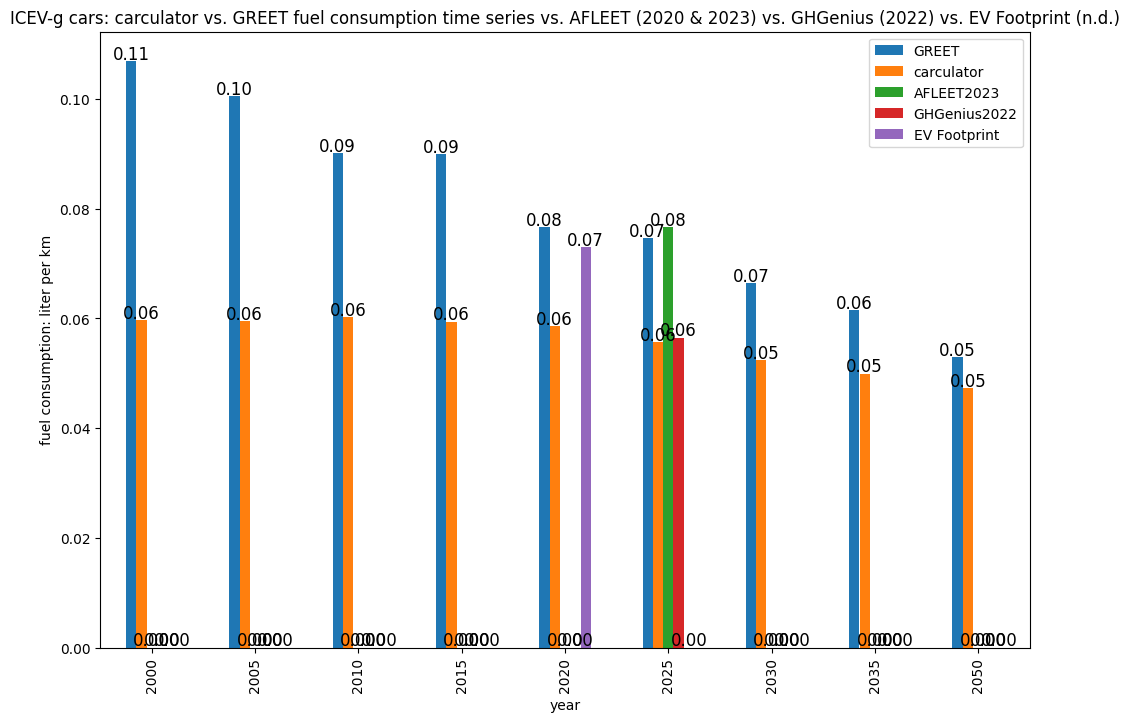

In [ ]:
plots = f_ts.plot.bar(x="year", y=["GREET","carculator", "AFLEET2023", "GHGenius2022", "EV Footprint"], ylabel = "gasoline_liter per km", figsize=(12,8) , width=0.5)  #align='edge'
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 5),
                   textcoords='offset points')

plt.title("ICEV-g cars: carculator vs. GREET fuel consumption time series vs. AFLEET (2020 & 2023) vs. GHGenius (2022) vs. EV Footprint (n.d.)")
plt.ylabel("fuel consumption: liter per km")

plt.show()

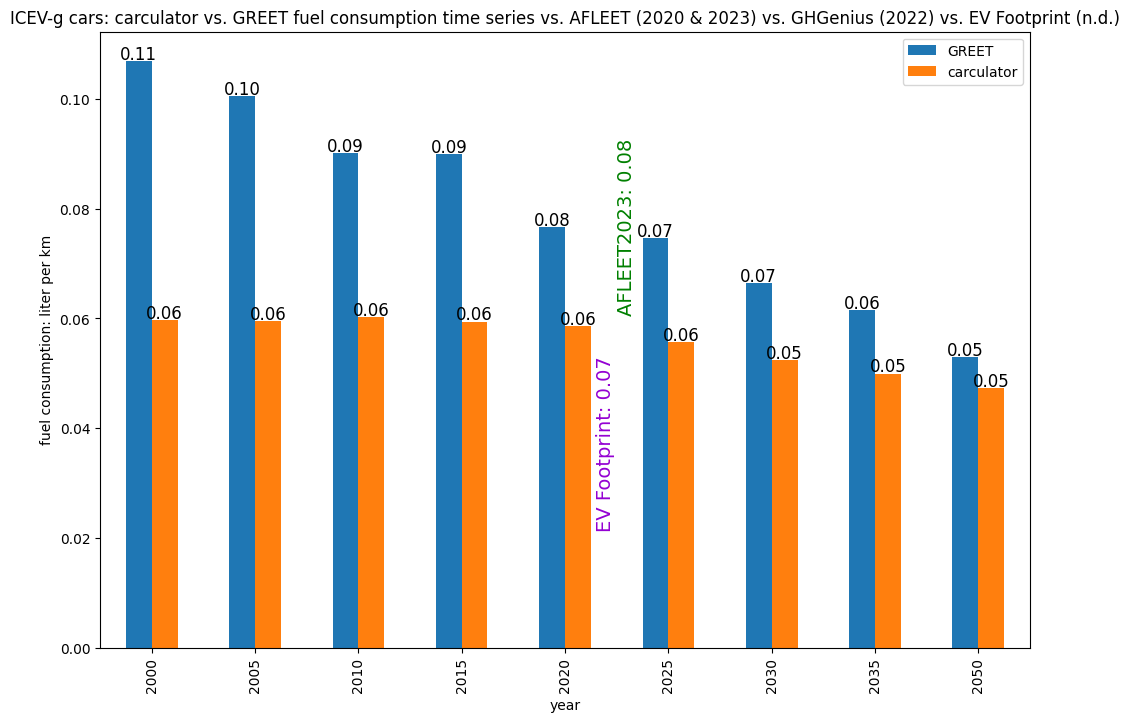

In [ ]:
plots = f_ts.plot.bar(x="year", y=["GREET","carculator", "AFLEET2023", "GHGenius2022", "EV Footprint"], ylabel = "gasoline_liter per km", figsize=(12,8) )
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 5),
                   textcoords='offset points')

#plots.annotate( ('AFLEET2020: ' + str(format(afleet_2020 , '.2f'))  ), xy=(5, 0), xytext=(3.5, afleet_2020*0.8),   #padding a bit
#            ha='left', rotation=90,  color="red", size = 14)

plots.annotate( ('AFLEET2023: ' + str(format(afleet_2023 , '.2f'))  ), xy=(5, 0), xytext=(4.5, afleet_2023*0.8),   #padding a bit
            ha='left', rotation=90,  color="green", size = 14)

plots.annotate( ('EV Footprint: ' + str(format(evf_2020 , '.2f'))  ), xy=(5, 0), xytext=(4.3, evf_2020*0.3),   #padding a bit
            ha='left', rotation=90,  color="darkviolet", size = 14)


plt.title("ICEV-g cars: carculator vs. GREET fuel consumption time series vs. AFLEET (2020 & 2023) vs. GHGenius (2022) vs. EV Footprint (n.d.)")
plt.ylabel("fuel consumption: liter per km")

plt.show()

### 2. diesel: same as gasoline scope

In [ ]:
scope = {
    'powertrain':["ICEV-d"],
    'size': ["Small", "Large", "Mini", "Lower medium", "Medium"]
}
_, array = fill_xarray_from_input_parameters(cip, scope=scope)
array = array.interp(year=greet_year,  kwargs={'fill_value': 'extrapolate'})
cm_d = CarModel(array, cycle=udds_kmh, country="US")
cm_d.set_all()

In [ ]:
carc_f_2000_2050 = cm_d.array.sel(parameter="fuel consumption")

car_f_ts_d = []
for y in greet_year:
  car_f_ts_d.append(np.average(carc_f_2000_2050.sel(year=y).values))

#car_f_ts_d

In [ ]:
ghgenius_2022_d = 4.6765/100

In [ ]:
evf_2020_d = 0.069 #cellH4, only for Medium Diesel Car (D Segment), not incl. Large Diesel SUV, "EVFootprint" sheet

In [ ]:
#same sheet as gas: https://docs.google.com/spreadsheets/d/1-8Psgcxqoh8eQ12n0QqfC2Ec6IUnzU8_witE_Nftl9s/edit#gid=1678979062
greet_f_ts_d = [0.0771919,0.0725738,0.0651159,0.0645306,0.0601252,0.0599836,0.0522240,0.0497320,0.0427577]
afleet_2020_d = 0.06340016
afleet_2023_d = 0.06391701

In [ ]:
f_ts_d = pd.DataFrame({"year":greet_year,
               "GREET": greet_f_ts_d,
                "carculator": car_f_ts_d})

In [ ]:
f_ts_d["AFLEET2020"] = [np.NaN , np.NaN ,np.NaN ,np.NaN , afleet_2020_d ,np.NaN ,np.NaN ,np.NaN, np.NaN  ]
f_ts_d["AFLEET2023"] =  [np.NaN , np.NaN ,np.NaN ,np.NaN , np.NaN , afleet_2023_d, np.NaN ,np.NaN, np.NaN  ]
f_ts_d["GHGenius2022"] = [np.NaN , np.NaN ,np.NaN ,np.NaN , np.NaN , ghgenius_2022_d, np.NaN ,np.NaN, np.NaN  ]
f_ts_d["EV Footprint"] = [np.NaN , np.NaN ,np.NaN ,np.NaN , evf_2020_d , np.NaN, np.NaN ,np.NaN, np.NaN  ]
f_ts_d

year     GREET  carculator  AFLEET2020  AFLEET2023  GHGenius2022  \
0  2000  0.077192    0.049658         NaN         NaN           NaN   
1  2005  0.072574    0.049578         NaN         NaN           NaN   
2  2010  0.065116    0.049328         NaN         NaN           NaN   
3  2015  0.064531    0.048463         NaN         NaN           NaN   
4  2020  0.060125    0.047301      0.0634         NaN           NaN   
5  2025  0.059984    0.044530         NaN    0.063917      0.046765   
6  2030  0.052224    0.042803         NaN         NaN           NaN   
7  2035  0.049732    0.039771         NaN         NaN           NaN   
8  2050  0.042758    0.037388         NaN         NaN           NaN   

   EV Footprint  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4         0.069  
5           NaN  
6           NaN  
7           NaN  
8           NaN

#### single plot for ICEV-d

Rectangle(xy=(-0.25, 0), width=0.25, height=0.0771919, angle=0)
Rectangle(xy=(0.75, 0), width=0.25, height=0.0725738, angle=0)
Rectangle(xy=(1.75, 0), width=0.25, height=0.0651159, angle=0)
Rectangle(xy=(2.75, 0), width=0.25, height=0.0645306, angle=0)
Rectangle(xy=(3.75, 0), width=0.25, height=0.0601252, angle=0)
Rectangle(xy=(4.75, 0), width=0.25, height=0.0599836, angle=0)
Rectangle(xy=(5.75, 0), width=0.25, height=0.052224, angle=0)
Rectangle(xy=(6.75, 0), width=0.25, height=0.049732, angle=0)
Rectangle(xy=(7.75, 0), width=0.25, height=0.0427577, angle=0)
Rectangle(xy=(0, 0), width=0.25, height=0.0496582, angle=0)
Rectangle(xy=(1, 0), width=0.25, height=0.0495776, angle=0)
Rectangle(xy=(2, 0), width=0.25, height=0.0493277, angle=0)
Rectangle(xy=(3, 0), width=0.25, height=0.0484634, angle=0)
Rectangle(xy=(4, 0), width=0.25, height=0.0473005, angle=0)
Rectangle(xy=(5, 0), width=0.25, height=0.0445299, angle=0)
Rectangle(xy=(6, 0), width=0.25, height=0.0428026, angle=0)
Rectangle(xy=(

Text(4.3, 0.055200000000000006, 'EV Footprint: 0.07')

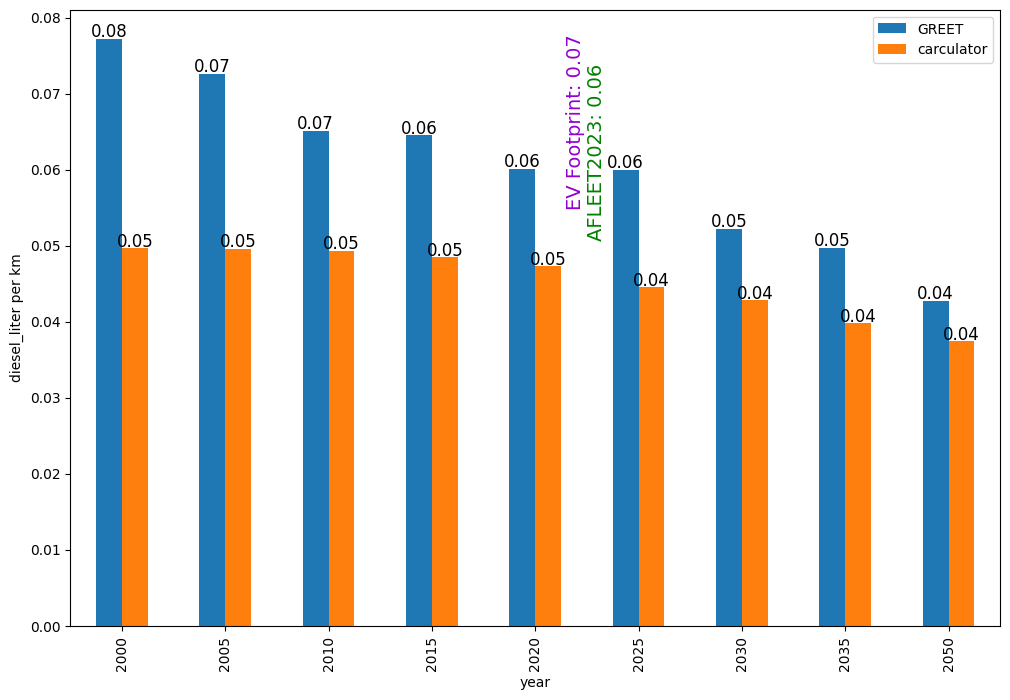

In [ ]:

plots2 = f_ts_d.plot.bar(x="year", y=["GREET","carculator"], ylabel = "diesel_liter per km", figsize=(12,8) )

for bar in plots2.patches:
    print(bar)
    plots2.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 5),
                   textcoords='offset points')
#plots2.annotate( ('AFLEET2020: ' + str(format(afleet_2020_d , '.2f'))  ), xy=(5, 0), xytext=(3.5, afleet_2020_d*0.8),   #padding a bit
#            ha='left', rotation=90,  color="red", size = 14)

plots2.annotate( ('AFLEET2023: ' + str(format(afleet_2023_d , '.2f'))  ), xy=(5, 0), xytext=(4.5, afleet_2023_d*0.8),   #padding a bit
            ha='left', rotation=90,  color="green", size = 14)

plots2.annotate( ('EV Footprint: ' + str(format(evf_2020_d , '.2f'))  ), xy=(5, 0), xytext=(4.3, evf_2020_d*0.8),   #padding a bit
            ha='left', rotation=90,  color="darkviolet", size = 14)

#plt.show()

### 3. BEV

GREET: H63:H71, AFLEET_2020 only: H55 -> "car_fuel_consmp" sheet @ https://docs.google.com/spreadsheets/d/1-8Psgcxqoh8eQ12n0QqfC2Ec6IUnzU8_witE_Nftl9s/edit#gid=1678979062

In [ ]:
scope = {
    'powertrain':["BEV"],
    'size': ["Small", "Large", "Mini", "Lower medium", "Medium"]
}
_, array = fill_xarray_from_input_parameters(cip, scope=scope)
array = array.interp(year=greet_year,  kwargs={'fill_value': 'extrapolate'})
cm_b = CarModel(array, cycle=udds_kmh, country="US")
cm_b.set_all()

In [ ]:
carc_f_2000_2050 = cm_b.array.sel(parameter="electricity consumption")

car_f_ts_b = []
for y in greet_year:
  car_f_ts_b.append(np.average(carc_f_2000_2050.sel(year=y).values))

car_f_ts_b
#unit is kWh/km: https://github.com/romainsacchi/carculator/blob/master/examples/Examples.ipynb

[0.18168452370303584,
 0.17743619037479258,
 0.17473929622579448,
 0.16214208603792124,
 0.15160863880450565,
 0.1467594097851427,
 0.1455493866666031,
 0.13071973157614072,
 0.12510853394919857]

In [ ]:
greet_f_ts_b = [0.2321715909,0.2182809829,0.2444309122,0.1986280142,0.1468140621,0.137314777,0.1325657521,0.1351894111,0.122684905]
# average of four BEV from GREET.NET
afleet_2020_b = 0.1923832575
afleet_2023_b = 0.1728519624
ghgenius_2022_b = 0.2
evf_2020_b = 0.185  #cell I11, "EVFootprint" sheet

In [ ]:
f_ts_b = pd.DataFrame({"year":greet_year,
               "GREET": greet_f_ts_b,
                "carculator": car_f_ts_b})

In [ ]:
f_ts_b["AFLEET2020"] = [np.NaN , np.NaN ,np.NaN ,np.NaN , afleet_2020_b ,np.NaN ,np.NaN ,np.NaN, np.NaN  ]
f_ts_b["AFLEET2023"] =  [np.NaN , np.NaN ,np.NaN ,np.NaN , np.NaN , afleet_2023_b, np.NaN ,np.NaN, np.NaN  ]
f_ts_b["GHGenius2022"] = [np.NaN , np.NaN ,np.NaN ,np.NaN , np.NaN , ghgenius_2022_b, np.NaN ,np.NaN, np.NaN  ]
f_ts_b["EV Footprint"] = [np.NaN , np.NaN ,np.NaN ,np.NaN , evf_2020_b, np.NaN, np.NaN ,np.NaN, np.NaN  ]
f_ts_b

year     GREET  carculator  AFLEET2020  AFLEET2023  GHGenius2022  \
0  2000  0.232172    0.181685         NaN         NaN           NaN   
1  2005  0.218281    0.177436         NaN         NaN           NaN   
2  2010  0.244431    0.174739         NaN         NaN           NaN   
3  2015  0.198628    0.162142         NaN         NaN           NaN   
4  2020  0.146814    0.151609    0.192383         NaN           NaN   
5  2025  0.137315    0.146759         NaN    0.172852           0.2   
6  2030  0.132566    0.145549         NaN         NaN           NaN   
7  2035  0.135189    0.130720         NaN         NaN           NaN   
8  2050  0.122685    0.125109         NaN         NaN           NaN   

   EV Footprint  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4         0.185  
5           NaN  
6           NaN  
7           NaN  
8           NaN

In [ ]:
f_ts.to_excel(f'{gdrive_path}/trial_code/benchmark/fuel_econ/results/fuel_consmp_ICEV-g.xlsx')
f_ts_d.to_excel(f'{gdrive_path}/trial_code/benchmark/fuel_econ/results/fuel_consmp_ICEV-d.xlsx')
f_ts_b.to_excel(f'{gdrive_path}/trial_code/benchmark/fuel_econ/results/fuel_consmp_BEV.xlsx')

## plotting 3 subplots

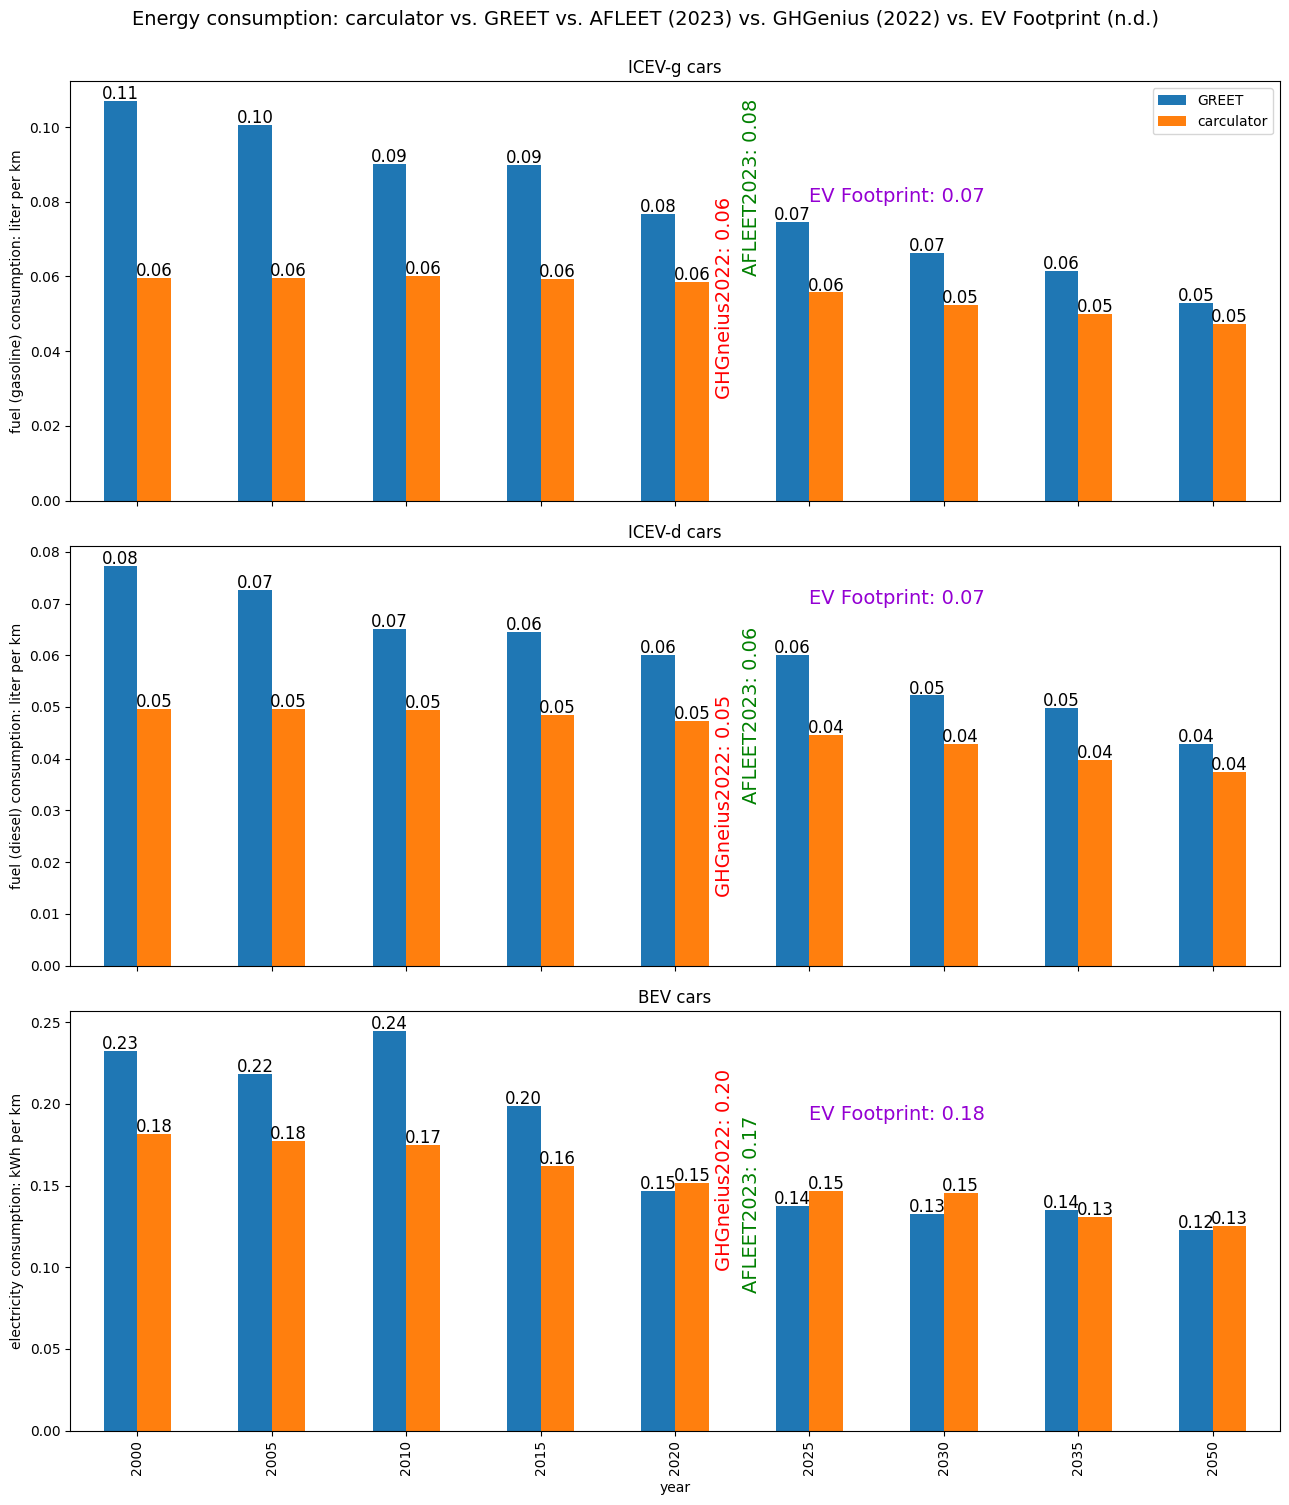

In [ ]:
fig, axes = plt.subplots(3, 1, sharex = True, figsize=(13, 15))

# Plot ICEV-g
plots1 = f_ts.plot.bar(x="year", y=["GREET","carculator"],  ax=axes[0] ) #ylabel = "gasoline_liter per km",
for bar in plots1.patches:
    plots1.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 5),
                   textcoords='offset points')
#plots.annotate( ('AFLEET2020: ' + str(format(afleet_2020 , '.2f'))  ), xy=(5, 0), xytext=(3.5, afleet_2020*0.8),
#            ha='left', rotation=90,  color="red", size = 14)
plots1.annotate( ('AFLEET2023: ' + str(format(afleet_2023 , '.2f'))  ), xy=(5, 0), xytext=(4.5, afleet_2023*0.8),
            ha='left', rotation=90,  color="green", size = 14)
plots1.annotate( ('GHGneius2022: ' + str(format(ghgenius_2022 , '.2f'))  ), xy=(5, 0), xytext=(4.3, ghgenius_2022*0.5),
            ha='left', rotation=90,  color="red", size = 14)
plots1.annotate( ('EV Footprint: ' + str(format(evf_2020 , '.2f'))  ), xy=(5, 0), xytext=(5, 0.08),
            ha='left', rotation=0,  color="darkviolet", size = 14)

axes[0].set_title("ICEV-g cars")
axes[0].set_xlabel("")
axes[0].set_ylabel('fuel (gasoline) consumption: liter per km')


# Plot ICEV-d
plots2 = f_ts_d.plot.bar(x="year", y=["GREET","carculator"],  ax=axes[1] )
for bar in plots2.patches:
    plots2.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 5),
                   textcoords='offset points')

#plots2.annotate( ('AFLEET2020: ' + str(format(afleet_2020_d , '.2f'))  ), xy=(5, 0), xytext=(3.5, afleet_2020_d*0.8),   #padding a bit
#            ha='left', rotation=90,  color="red", size = 14)

plots2.annotate( ('AFLEET2023: ' + str(format(afleet_2023_d , '.2f'))  ), xy=(5, 0), xytext=(4.5, afleet_2023_d*0.5),
            ha='left', rotation=90,  color="green", size = 14)
plots2.annotate( ('GHGneius2022: ' + str(format(ghgenius_2022_d , '.2f'))  ), xy=(5, 0), xytext=(4.3, ghgenius_2022_d*0.3),
            ha='left', rotation=90,  color="red", size = 14)
plots2.annotate( ('EV Footprint: ' + str(format(evf_2020_d , '.2f'))  ), xy=(5, 0), xytext=(5, 0.07),
            ha='left', rotation=0,  color="darkviolet", size = 14)

axes[1].set_title("ICEV-d cars")
axes[1].set_xlabel("")
axes[1].set_ylabel('fuel (diesel) consumption: liter per km')
axes[1].legend().set_visible(False)


# Plot BEV
plots3 = f_ts_b.plot.bar(x="year", y=["GREET","carculator"],  ax=axes[2] )
for bar in plots3.patches:
    plots3.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 5),
                   textcoords='offset points')

#plots2.annotate( ('AFLEET2020: ' + str(format(afleet_2020_d , '.2f'))  ), xy=(5, 0), xytext=(3.5, afleet_2020_d*0.8),   #padding a bit
#            ha='left', rotation=90,  color="red", size = 14)

plots3.annotate( ('AFLEET2023: ' + str(format(afleet_2023_b , '.2f'))  ), xy=(5, 0), xytext=(4.5, afleet_2023_b*0.5),
            ha='left', rotation=90,  color="green", size = 14)
plots3.annotate( ('GHGneius2022: ' + str(format(ghgenius_2022_b , '.2f'))  ), xy=(5, 0), xytext=(4.3, ghgenius_2022_b*0.5),
            ha='left', rotation=90,  color="red", size = 14)
plots3.annotate( ('EV Footprint: ' + str(format(evf_2020_b , '.2f'))  ), xy=(5, 0), xytext=(5, 0.19),
            ha='left', rotation=0,  color="darkviolet", size = 14)

axes[2].set_title("BEV cars")
axes[2].set_ylabel('electricity consumption: kWh per km')
axes[2].legend().set_visible(False)


plt.suptitle ("Energy consumption: carculator vs. GREET vs. AFLEET (2023) vs. GHGenius (2022) vs. EV Footprint (n.d.)", size = 14, y=1)
plt.tight_layout()

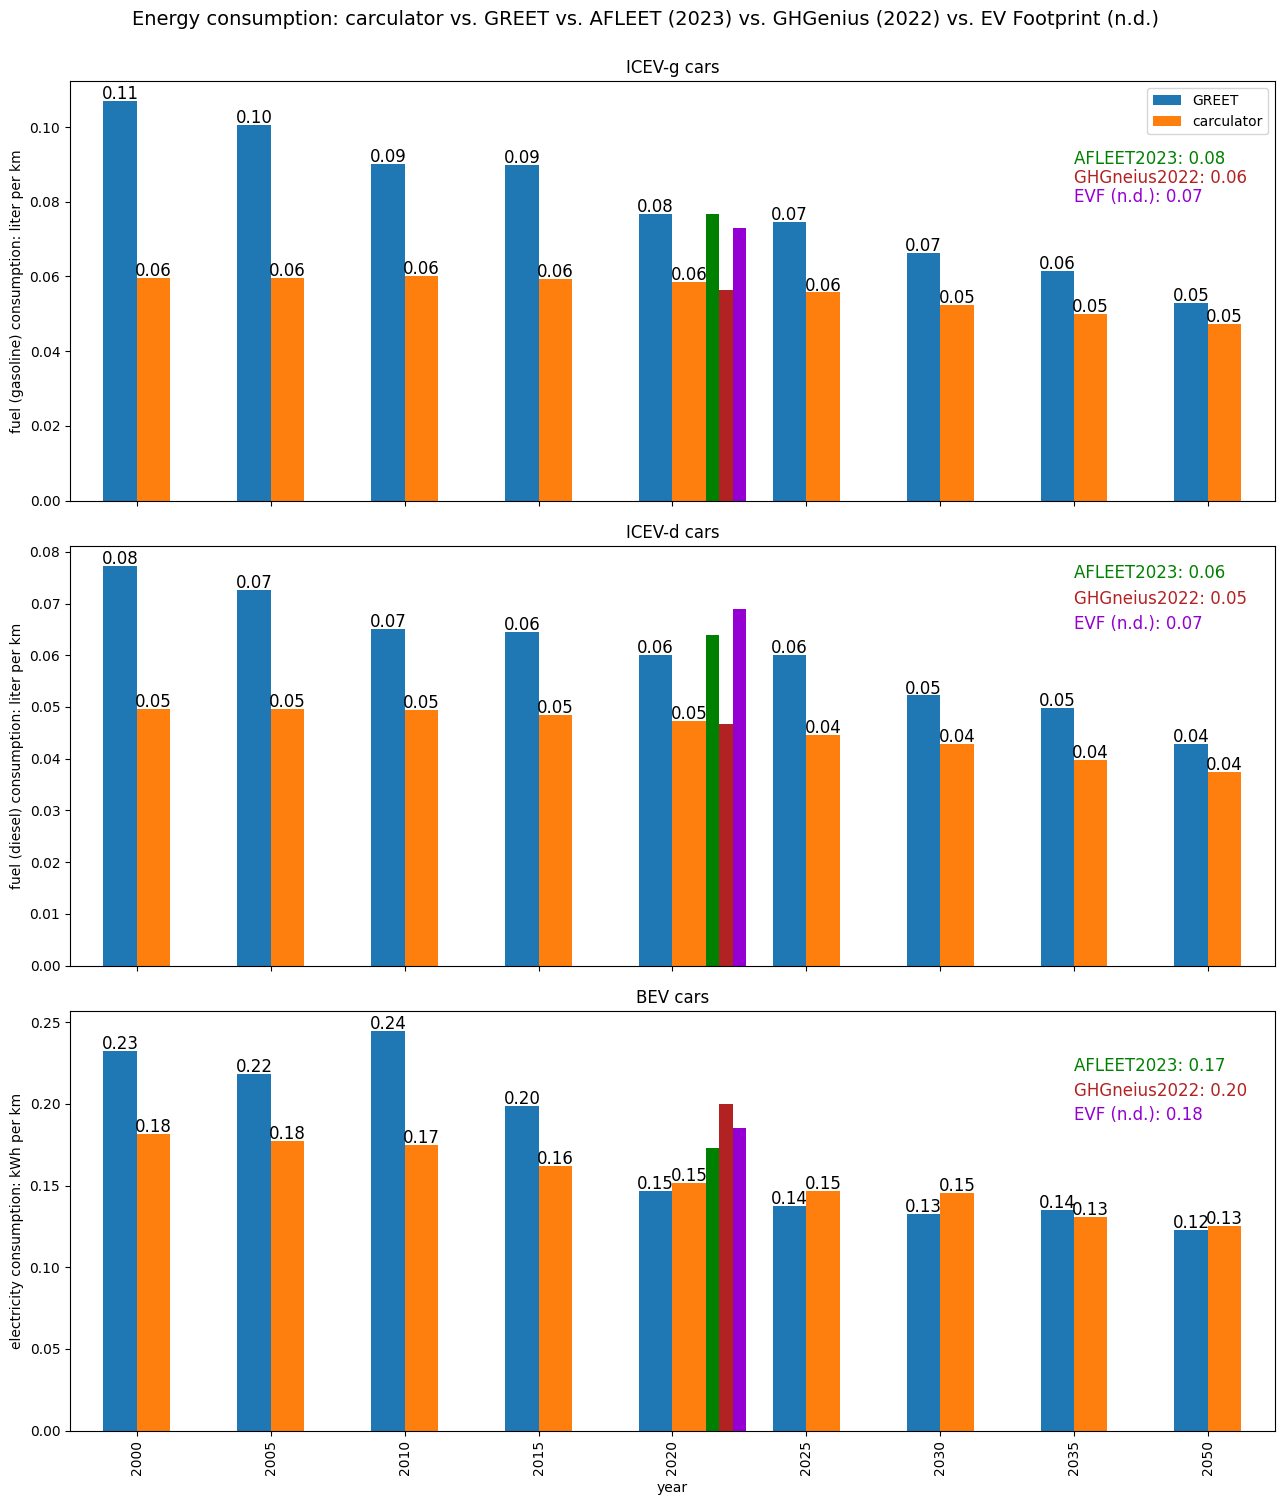

In [ ]:
fig, axes = plt.subplots(3, 1, sharex = True, figsize=(13, 15))   #

# Add a customized bar manually for AFLEET / GHGenius / EV Footprint, common attributes
custom_bar_category = [ 4.3, 4.4, 4.5]
custom_bar_color = ['g', 'firebrick', 'darkviolet' ]  #https://matplotlib.org/stable/gallery/color/named_colors.html
custom_bar_width =  [0.1, 0.1, 0.1]


# Plot ICEV-g
plots1 = f_ts.plot.bar(x="year", y=["GREET","carculator"],  ax=axes[0] ) #ylabel = "gasoline_liter per km",
for bar in plots1.patches:
    plots1.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=12, xytext=(0, 5), textcoords='offset points')

# Manually add the customized bar
custom_bar_value_p = [afleet_2023, ghgenius_2022, evf_2020 ]
axes[0].bar(custom_bar_category, custom_bar_value_p, color=custom_bar_color, width = custom_bar_width,  label='Custom Bar') #,
plots1.annotate( ('AFLEET2023: ' + str(format(afleet_2023 , '.2f'))  ), xy=(7, 0), xytext=(7, 0.09),  ha='left', rotation=0,  color=custom_bar_color[0], size = 12)
plots1.annotate( ('GHGneius2022: ' + str(format(ghgenius_2022 , '.2f'))  ), xy=(7, 0), xytext=(7, 0.085),  ha='left', rotation=0,  color=custom_bar_color[1], size = 12)
plots1.annotate( ('EVF (n.d.): ' + str(format(evf_2020 , '.2f'))  ), xy=(7, 0), xytext=(7, 0.08),  ha='left', rotation=0,  color=custom_bar_color[2], size = 12)


axes[0].set_title("ICEV-g cars")
axes[0].set_xlabel("")
axes[0].set_ylabel('fuel (gasoline) consumption: liter per km')


# Plot ICEV-d
plots2 = f_ts_d.plot.bar(x="year", y=["GREET","carculator"],  ax=axes[1] )
for bar in plots2.patches:
    plots2.annotate(format(bar.get_height(), '.2f'),(bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=12, xytext=(0, 5), textcoords='offset points')

# Manually add the customized bar
custom_bar_value_d = [afleet_2023_d, ghgenius_2022_d, evf_2020_d ]
axes[1].bar(custom_bar_category, custom_bar_value_d, color=custom_bar_color, width = custom_bar_width,  label='Custom Bar') #,
plots2.annotate( ('AFLEET2023: ' + str(format(afleet_2023_d , '.2f'))  ), xy=(7, 0), xytext=(7, 0.075),  ha='left', rotation=0,  color=custom_bar_color[0], size = 12)
plots2.annotate( ('GHGneius2022: ' + str(format(ghgenius_2022_d , '.2f'))  ), xy=(7, 0), xytext=(7, 0.07),  ha='left', rotation=0,  color=custom_bar_color[1], size = 12)
plots2.annotate( ('EVF (n.d.): ' + str(format(evf_2020_d , '.2f'))  ), xy=(7, 0), xytext=(7, 0.065),  ha='left', rotation=0,  color=custom_bar_color[2], size = 12)

axes[1].set_title("ICEV-d cars")
axes[1].set_xlabel("")
axes[1].set_ylabel('fuel (diesel) consumption: liter per km')
axes[1].legend().set_visible(False)


# Plot BEV
plots3 = f_ts_b.plot.bar(x="year", y=["GREET","carculator"],  ax=axes[2] )
for bar in plots3.patches:
    plots3.annotate(format(bar.get_height(), '.2f'),(bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=12, xytext=(0, 5), textcoords='offset points')

# Manually add the customized bar
custom_bar_value_b = [afleet_2023_b, ghgenius_2022_b, evf_2020_b]
axes[2].bar(custom_bar_category, custom_bar_value_b, color=custom_bar_color, width = custom_bar_width,  label='Custom Bar') #,
plots3.annotate( ('AFLEET2023: ' + str(format(afleet_2023_b , '.2f'))  ), xy=(7, 0), xytext=(7, 0.22),  ha='left', rotation=0,  color=custom_bar_color[0], size = 12)
plots3.annotate( ('GHGneius2022: ' + str(format(ghgenius_2022_b , '.2f'))  ), xy=(7, 0), xytext=(7, 0.205),  ha='left', rotation=0,  color=custom_bar_color[1], size = 12)
plots3.annotate( ('EVF (n.d.): ' + str(format(evf_2020_b , '.2f'))  ), xy=(7, 0), xytext=(7, 0.19),  ha='left', rotation=0,  color=custom_bar_color[2], size = 12)

axes[2].set_title("BEV cars")
axes[2].set_ylabel('electricity consumption: kWh per km')
axes[2].legend().set_visible(False)


plt.suptitle ("Energy consumption: carculator vs. GREET vs. AFLEET (2023) vs. GHGenius (2022) vs. EV Footprint (n.d.)", size = 14, y=1)
plt.tight_layout()


